In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("train.csv")

# Preview the first few rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Extract surname from Name before dropping
df['Last_Name'] = df['Name'].str.split(',').str[0]

# Drop Name and Ticket
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [4]:
# Fill missing Age values with median age by Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [5]:
# Fill missing cabin for family members by using family's known cabin
family_cabins = df.groupby('Last_Name')['Cabin'].agg(
    lambda x: x.dropna().iloc[0] if x.notna().any() else np.nan
)

# Fill missing cabins with family cabin if available
df['Cabin'] = df.apply(
    lambda row: family_cabins[row['Last_Name']]
    if pd.isna(row['Cabin'])
    else row['Cabin'],
    axis=1
)

# Replace any still-missing cabins with "Unknown"
df['Cabin'] = df['Cabin'].fillna("Unknown")

In [6]:
# Format Fare to 2 decimal places
df['Fare'] = df['Fare'].round(2)

In [7]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Convert data types
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Cabin'] = df['Cabin'].astype(str)

In [9]:
# Drop temporary Last_Name column
df.drop('Last_Name', axis=1, inplace=True)

In [10]:
# Save the cleaned dataset
df.to_csv("titanic_cleaned_final.csv", index=False)
print("✅ Cleaned dataset saved as 'titanic_cleaned_final.csv'.")

✅ Cleaned dataset saved as 'titanic_cleaned_final.csv'.


#  - - Data Visualization - -

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("titanic_cleaned_final.csv")

# Preview the few rows
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.25,Unknown,S
1,2,1,1,female,38.0,1,0,71.28,C85,C
2,3,1,3,female,26.0,0,0,7.92,Unknown,S
3,4,1,1,female,35.0,1,0,53.10,C123,S
4,5,0,3,male,35.0,0,0,8.05,B5,S
5,6,0,3,male,24.0,0,0,8.46,Unknown,Q
6,7,0,1,male,54.0,0,0,51.86,E46,S
7,8,0,3,male,2.0,3,1,21.08,Unknown,S
8,9,1,3,female,27.0,0,2,11.13,Unknown,S
9,10,1,2,female,14.0,1,0,30.07,Unknown,C


### Total number of passengers based on Pclass, Sex, and Age

1. Pclass

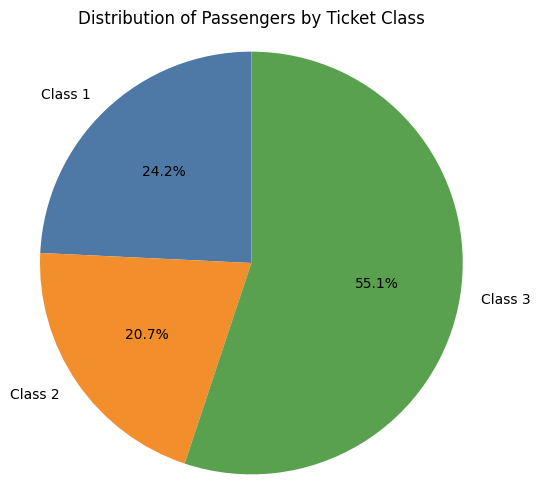

In [13]:
# Count number of passengers in each Pclass
pclass_counts = df['Pclass'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(pclass_counts, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', startangle=90, colors=['#4e79a7', '#f28e2b', '#59a14f'])
plt.title('Distribution of Passengers by Ticket Class')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [14]:
print(pclass_counts)

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


2. Sex

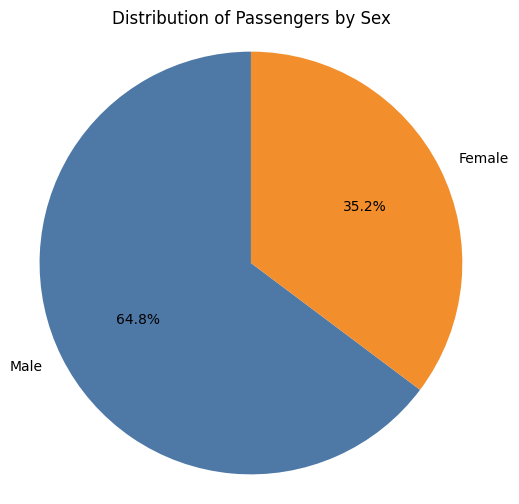

In [15]:
# Count number of passengers by sex
sex_counts = df['Sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index.str.capitalize(), autopct='%1.1f%%', startangle=90, colors=['#4e79a7', '#f28e2b'])
plt.title('Distribution of Passengers by Sex')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [16]:
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


3. Age distribution

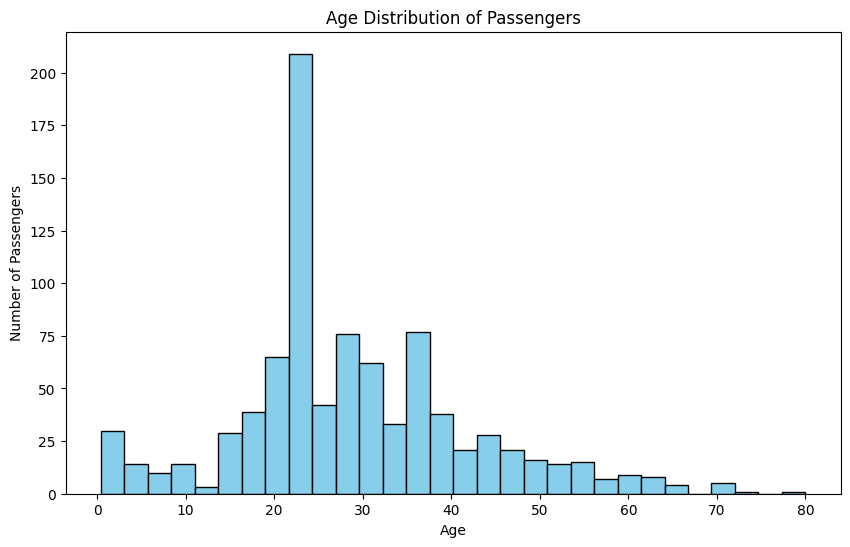

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

### Show the relationship between a passenger's Pclass and survival rate

In [18]:
# Count survivors and non-survivors in each class
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
survival_counts.columns = ['Did Not Survive', 'Survived']

survival_counts = survival_counts[['Survived', 'Did Not Survive']]

# Add survival rate column
survival_counts['Survival Rate (%)'] = (survival_counts['Survived'] / (survival_counts['Survived'] + survival_counts['Did Not Survive'])) * 100

print(survival_counts)

        Survived  Did Not Survive  Survival Rate (%)
Pclass                                              
1            136               80          62.962963
2             87               97          47.282609
3            119              372          24.236253


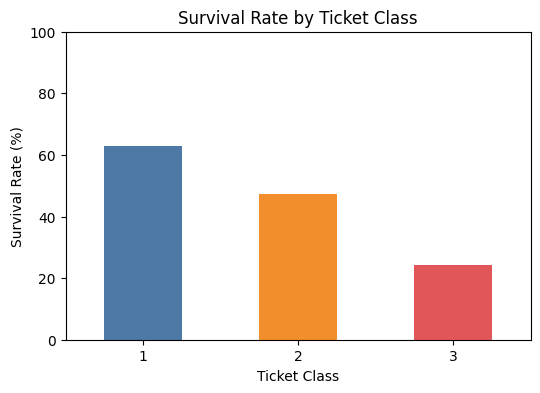

In [19]:
# Bar plot
plt.figure(figsize=(6,4))
survival_counts['Survival Rate (%)'].plot(kind='bar', color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

## Show the relationship between a passenger's sex and survival rate

In [20]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = (sum(women)/len(women)) * 100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [21]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = (sum(men)/len(men)) * 100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


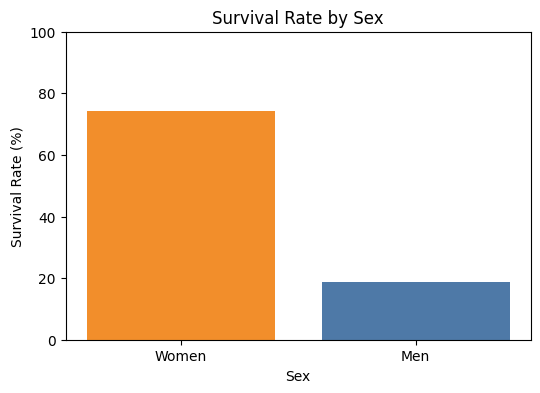

In [22]:
# Bar plot
sex_rates = {'Women': rate_women, 'Men': rate_men}

plt.figure(figsize=(6,4))
plt.bar(sex_rates.keys(), sex_rates.values(), color=['#f28e2b', '#4e79a7'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

## Show the relationship between a passenger's age and survival rate.

In [23]:
# We'll bin ages for better visualization
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
print("Survival rate by age group (%):")
print(age_survival)

Survival rate by age group (%):
AgeGroup
Child          57.352941
Teen           48.888889
Young Adult    31.818182
Adult          42.307692
Senior         35.616438
Name: Survived, dtype: float64


C:\Users\mart\AppData\Local\Temp\ipykernel_23848\2908523763.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100


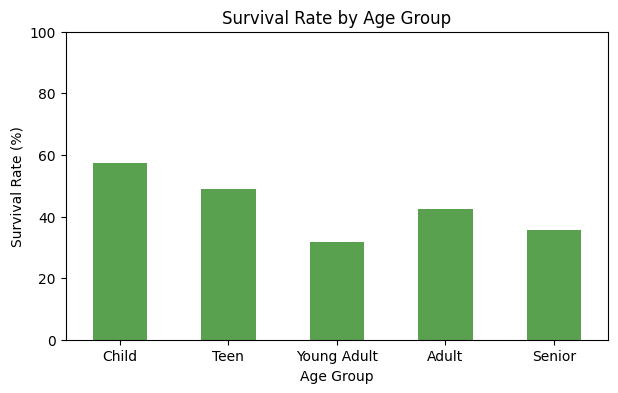

In [24]:
# Bar plot
plt.figure(figsize=(7,4))
age_survival.plot(kind='bar', color='#59a14f')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

## Display the relationship between the survival rate and passenger's Pclass, Sex, and Age.

1. Relationship between Pclass and sex.

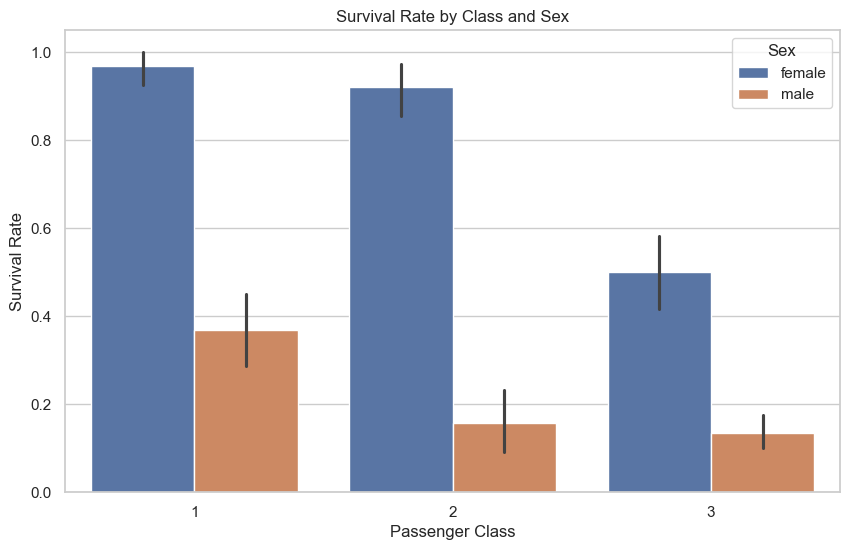

In [25]:
# Set up the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Class and Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Sex')
plt.show()

<small> We can see based on the image that females has a high surival rate in all three classes. </small>

2. Age distribution by Survival.

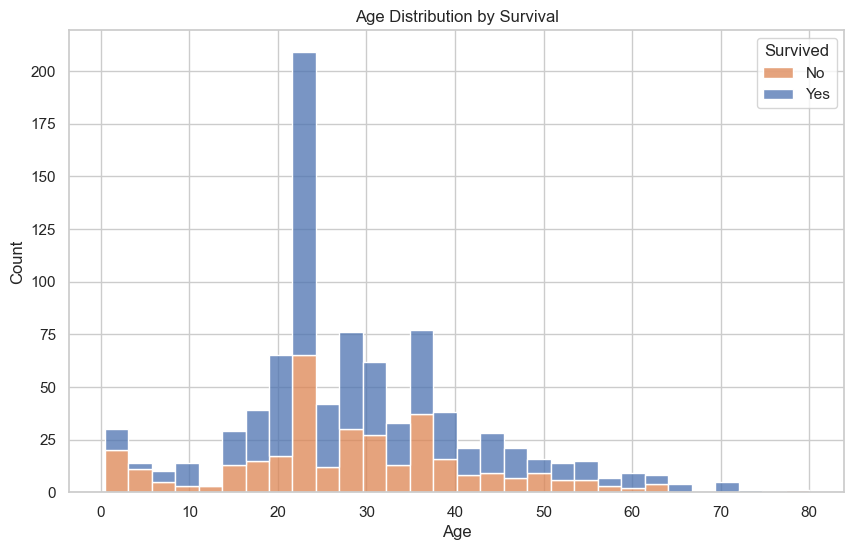

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<small>
The current visualization might be a little confusing and can be mistaken as misleading at first because children supposedly must show greater difference of survival compare to adults (refer to Survival Rate by Age Group). We'll see what are the other factors that results to this. </small>

2.1 Number of children per Pclass

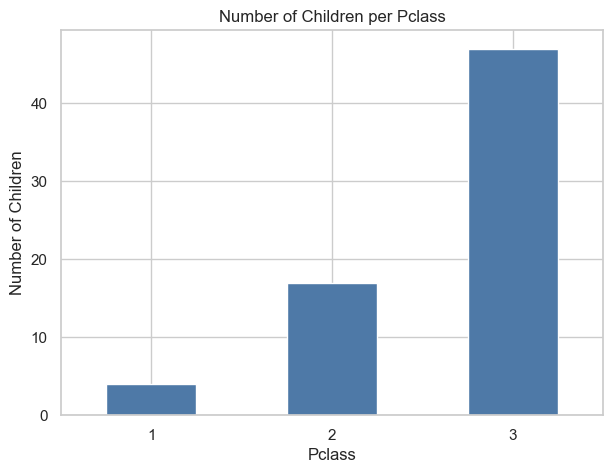

In [27]:
# Count the number of children per Pclass
children_per_class = df[df['AgeGroup'] == 'Child']['Pclass'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(7, 5))
children_per_class.plot(kind='bar', color='#4e79a7')
plt.title('Number of Children per Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Children')
plt.xticks(rotation=0)
plt.show()

In [28]:
print("Number of children per Pclass:")
print(children_per_class)

Number of children per Pclass:
Pclass
1     4
2    17
3    47
Name: count, dtype: int64


<small> We can see that most of the children are from Pclass 3 </small>

2.2 Survival rate of children per Pclass

In [29]:
# Filter for children
children = df[df['AgeGroup'] == 'Child']

# Group by Pclass and Survived, then count
child_counts = children.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Columns
child_counts.columns = ['Did Not Survive', 'Survived']

# Calculate survival rate
child_counts['Survival Rate (%)'] = (child_counts['Survived'] / (child_counts['Survived'] + child_counts['Did Not Survive'])) * 100

print(child_counts)

        Did Not Survive  Survived  Survival Rate (%)
Pclass                                              
1                     1         3          75.000000
2                     0        17         100.000000
3                    28        19          40.425532


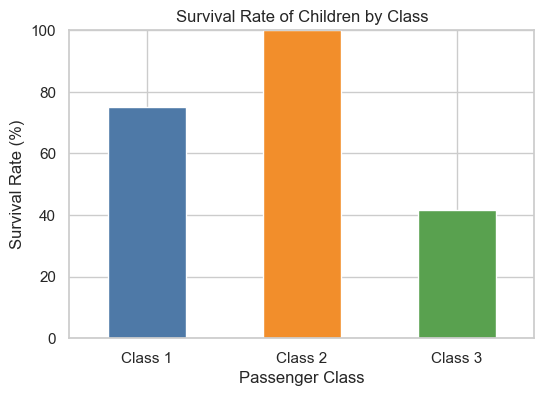

In [30]:
child_class_survival = df[df['Age'] < 13].groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(6,4))
child_class_survival.plot(kind='bar', color=['#4e79a7', '#f28e2b', '#59a14f'])
plt.title('Survival Rate of Children by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.xticks([0,1,2], ['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.show()

<small> We can see that children from Pclass 3 have a very low survival rate compared to other Pclasses. Simply put, this conclusion indicates that Pclass plays a significant role in whether you are a child. </small>

3. Overall survival rate based on Age, Sex, and Pclass

C:\Users\mart\AppData\Local\Temp\ipykernel_23848\922974581.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo_binned = df.groupby(['AgeGroup', 'Sex', 'Pclass'])['Survived'].mean().reset_index()


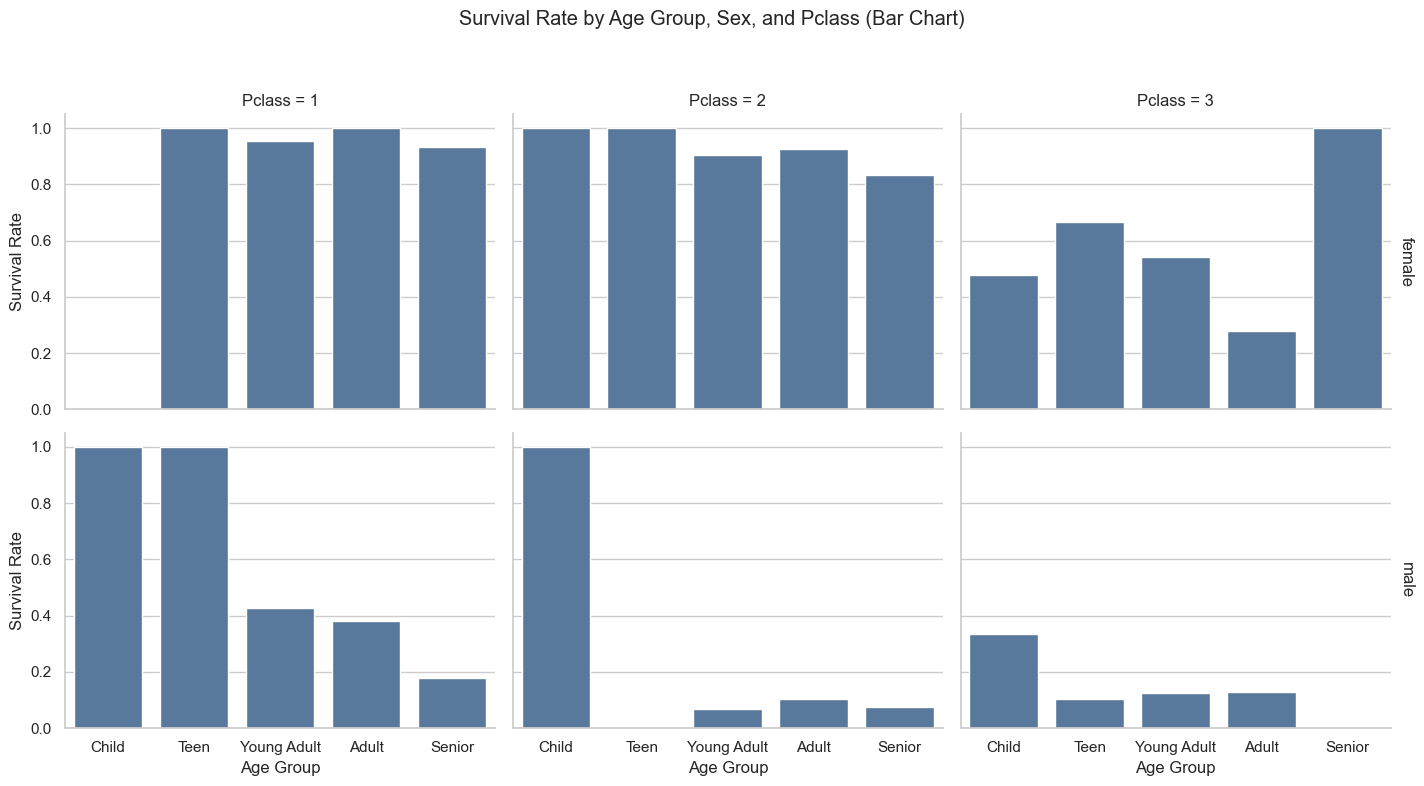

In [31]:
# Define age bins and labels
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival rate for each combination
combo_binned = df.groupby(['AgeGroup', 'Sex', 'Pclass'])['Survived'].mean().reset_index()

# Plot using FacetGrid with vertical bars
g = sns.FacetGrid(combo_binned, row='Sex', col='Pclass', margin_titles=True, height=4, aspect=1.2, sharex=True)
g.map_dataframe(sns.barplot, x='AgeGroup', y='Survived', color='#4e79a7', order=age_labels)
g.set_axis_labels("Age Group", "Survival Rate")
g.set_titles(row_template='{row_name}', col_template='Pclass = {col_name}')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Age Group, Sex, and Pclass (Bar Chart)')
plt.show()

Conclusion: Survival on the Titanic was most strongly influenced by sex (females prioritized), then by class (higher class = higher survival), and then by age (children prioritized, especially girls). Males, especially in lower classes and older age groups, had the lowest survival rates.